In [2]:
import sys
sys.path.append("..")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

tqdm.pandas()

In [4]:
ratings_df = pd.read_csv("../data/ml-25m/ratings.csv")
movie_df = pd.read_csv("../data/ml-25m/movies.csv")

In [5]:
movie_df.genres = movie_df.genres.progress_apply(lambda s: s.split("|"))
movie_df = pd.concat([movie_df, pd.get_dummies(movie_df.genres.explode()).groupby(level=0).sum()], axis=1)

all_genres = movie_df.genres.explode().unique().tolist()

ratings_df = pd.merge(ratings_df, movie_df, on="movieId", how="left")
ratings_df

100%|██████████| 62423/62423 [00:00<00:00, 736085.06it/s]


,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,296,5.0,1147880044,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,665,5.0,1147878820,Underground (1995),"[Comedy, Drama, War]",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,899,3.5,1147868510,Singin' in the Rain (1952),"[Comedy, Musical, Romance]",0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,Ratatouille (2007),"[Animation, Children, Drama]",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25000091,162541,55768,2.5,1240951998,Bee Movie (2007),"[Animation, Comedy]",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25000092,162541,56176,2.0,1240950697,Alvin and the Chipmunks (2007),"[Children, Comedy]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25000093,162541,58559,4.0,1240953434,"Dark Knight, The (2008)","[Action, Crime, Drama, IMAX]",0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
a = ratings_df.groupby("userId")[all_genres].sum()
row_sum = a.sum(axis=1)
for genre in all_genres:
    a[genre] /= row_sum
genre_var = a.var(axis=1).rename("genre_var")
user_occur = ratings_df.userId.value_counts().sort_index().rename("review_count")

df = pd.concat([genre_var, user_occur], axis=1)
df

,genre_var,review_count
userId,,
1,0.006177,70
2,0.002665,184
3,0.002440,656
4,0.002677,242
5,0.003086,101
...,...,...
162537,0.003776,101
162538,0.003656,154
162539,0.003028,47


In [7]:
df[df.review_count <= 1000].corr()

,genre_var,review_count
genre_var,1.000000,-0.189857
review_count,-0.189857,1.000000


<Axes: xlabel='review_count', ylabel='genre_var'>

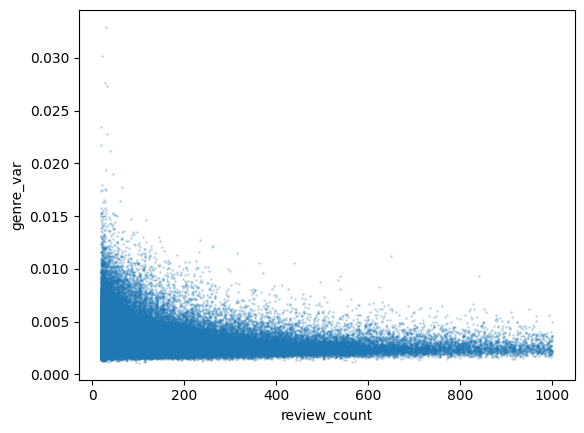

In [8]:
df[df.review_count <= 1000].plot.scatter("review_count", "genre_var", alpha=0.2, s=1)